In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [45]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

def podar(arr, percent):
    n = len(arr)
    k = int(round(n*(float(percent)/100)/2))
    return arr[k+1:n-k]

# Experimentos del TP de TSP
En esta carpeta de Jupyter vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.
1. **nuestros**: Son instancias con numeros aleatorios generadas por nosotros, con tamaño de 10 a 100.
2. **mismo_tamanio**: Instancias aleatorias generadas todas con el mismo tamanio y rango de costos.
3. **tsplib**: Instancias de parseadas desde tsplib con 500 o menos vertices.

# Experimentos
Leemos el dataframe con todos los resultados.

In [46]:
df_resultados = pd.read_csv("resultados/resultado-tsplib.csv");
df_nuestros = pd.read_csv("resultados/resultado-aleatorias.csv");
df_fijos = pd.read_csv("resultados/resultado-50.csv");

df_optimos = pd.read_csv("optimos.csv");
optimos = df_optimos.set_index('instancia').T.to_dict('list')

df_nuevosnuevos.head()

,instancia,metodo,tiempo,tamaño,costo,tipo_memoria,iteraciones,T
0,gr17,H-CG,0.013095,17,2187,NaN,NaN,NaN
1,a280,H-CG,1.762680,280,3157,NaN,NaN,NaN
2,att48,H-CG,0.084742,48,12861,NaN,NaN,NaN
3,bayg29,H-CG,0.039195,29,2005,NaN,NaN,NaN
4,bays29,H-CG,0.032612,29,2258,NaN,NaN,NaN


## Experimento 1: Golosa vs AGM

In [47]:
bins = [-1, 20, 40, 60, 80, 100, 250, np.inf]
labels = ['20', '40','60','80','100','250', '500']

df_goloso = df_resultados[df_resultados["metodo"]=="H-CG"].copy();
df_agm = df_resultados[df_resultados["metodo"]=="H-AGM"].copy();

gaps_goloso = [(instancia_goloso['costo'] - optimos[instancia_goloso['instancia']][0]) / optimos[instancia_goloso['instancia']][0] * 100 for i, instancia_goloso in df_goloso.iterrows()]
gaps_agm = [(instancia_goloso['costo'] - optimos[instancia_goloso['instancia']][0]) / optimos[instancia_goloso['instancia']][0] * 100 for i, instancia_goloso in df_agm.iterrows()]

gaps_goloso = stats.trimboth(gaps_goloso, 0.05)
gaps_agm = stats.trimboth(gaps_agm, 0.05)


print('Mediana goloso:', np.median(gaps_goloso))
print('Mediana AGM:', np.median(gaps_agm))
print('Promedio goloso:',np.mean(gaps_goloso))
print('Promedio AGM:',np.mean(gaps_agm))
print('Varianza goloso:', np.var(gaps_goloso))
print('Varianza AGM:', np.var(gaps_agm))

Mediana goloso: 23.044096922929576
Mediana AGM: 35.10495113103066
Promedio goloso: 23.868398740930637
Promedio AGM: 34.36323416935361
Varianza goloso: 49.89575778447673
Varianza AGM: 51.48851020395873


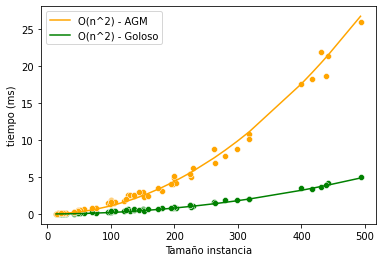

In [48]:
df_goloso = df_resultados[(df_resultados["metodo"]=="H-CG")].copy();
df_agm = df_resultados[(df_resultados["metodo"]=="H-AGM")].copy();
df_goloso['tiempo_esperado'] = df_goloso["tamaño"] ** 2 * 0.00002;
df_agm['tiempo_esperado'] = df_agm["tamaño"] ** 2 * 0.00011;
fig = sns.scatterplot(data=df_goloso, x='tamaño', y='tiempo', color="green");
fig = sns.scatterplot(data=df_agm, x='tamaño', y='tiempo', color="orange");
fig = sns.lineplot(data=df_agm, x='tamaño', y='tiempo_esperado', color="orange");
fig = sns.lineplot(data=df_goloso, x='tamaño', y='tiempo_esperado', color="green");
fig.legend(labels=['O(n^2) - AGM','O(n^2) - Goloso']); 
fig.set(xlabel='Tamaño instancia', ylabel='tiempo (ms)');
plt.savefig("graficos/agm-vs-goloso.png")

In [49]:
bins = [-1, 20, 40, 60, 80, 100, 250, np.inf]
labels = ['20', '40','60','80','100','250', '500']

df_goloso = df_resultados[df_resultados["metodo"]=="H-CG"].copy();
df_agm = df_resultados[df_resultados["metodo"]=="H-AGM"].copy();
df_bl = df_resultados[df_resultados["metodo"]=="BL"].copy();
df_tabu = df_resultados[(df_resultados["metodo"]=="BL-Tabu") & (df_resultados["T"]==10) & (df_resultados["iteraciones"]==1000)].copy();

gaps_goloso = [(instancia_goloso['costo'] - optimos[instancia_goloso['instancia']][0]) / optimos[instancia_goloso['instancia']][0] * 100 for i, instancia_goloso in df_goloso.iterrows()]
gaps_agm = [(instancia_goloso['costo'] - optimos[instancia_goloso['instancia']][0]) / optimos[instancia_goloso['instancia']][0] * 100 for i, instancia_goloso in df_agm.iterrows()]
gaps_bl = [(instancia_goloso['costo'] - optimos[instancia_goloso['instancia']][0]) / optimos[instancia_goloso['instancia']][0] * 100 for i, instancia_goloso in df_bl.iterrows()]
gaps_tabu = [(instancia_goloso['costo'] - optimos[instancia_goloso['instancia']][0]) / optimos[instancia_goloso['instancia']][0] * 100 for i, instancia_goloso in df_tabu.iterrows()]

gaps_goloso = stats.trimboth(gaps_goloso, 0.05)
gaps_agm = stats.trimboth(gaps_agm, 0.05)
gaps_bl = stats.trimboth(gaps_bl, 0.05)
gaps_tabu = stats.trimboth(gaps_tabu, 0.05)


print('Mediana goloso:', np.median(gaps_goloso))
print('Mediana AGM:', np.median(gaps_agm))
print('Mediana Busqueda Local:', np.median(gaps_bl))
print('Promedio goloso:',np.mean(gaps_goloso))
print('Promedio AGM:',np.mean(gaps_agm))
print('Promedio Busqueda Local:',np.mean(gaps_bl))
print('Varianza goloso:', np.var(gaps_goloso))
print('Varianza AGM:', np.var(gaps_agm))
print('Varianza Busqueda Local:', np.var(gaps_bl))


Mediana goloso: 23.044096922929576
Mediana AGM: 35.10495113103066
Mediana Busqueda Local: 16.488508872640843
Promedio goloso: 23.868398740930637
Promedio AGM: 34.36323416935361
Promedio Busqueda Local: 16.579831170610984
Varianza goloso: 49.89575778447673
Varianza AGM: 51.48851020395873
Varianza Busqueda Local: 40.450865448557174


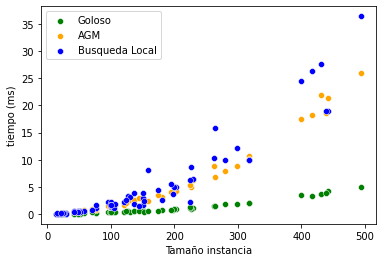

In [50]:
df_goloso = df_resultados[(df_resultados["metodo"]=="H-CG")].copy();
df_agm = df_resultados[(df_resultados["metodo"]=="H-AGM")].copy();
df_bl = df_resultados[(df_resultados["metodo"]=="BL")].copy();

fig = sns.scatterplot(data=df_goloso, x='tamaño', y='tiempo', color="green");
fig = sns.scatterplot(data=df_agm, x='tamaño', y='tiempo', color="orange");
fig = sns.scatterplot(data=df_bl, x='tamaño', y='tiempo', color="blue");
fig.legend(labels=['Goloso','AGM', "Busqueda Local"]);
fig.set(xlabel='Tamaño instancia', ylabel='tiempo (ms)');
plt.savefig("graficos/agm-vs-goloso-vs-bl.png")

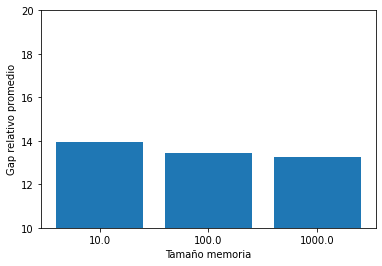

In [51]:
df_tabu = df_resultados[(df_resultados["metodo"]=="BL-Tabu")].copy();
df_tabu['gap'] = [(instancia['costo'] - optimos[instancia['instancia']][0]) / optimos[instancia['instancia']][0] * 100 for i, instancia in df_tabu.iterrows()]

Ts = df_tabu['T'];
ciclos_means = []
Ts = list(dict.fromkeys(Ts))
for T in Ts:
    ciclos_gaps = df_tabu[(df_tabu['tipo_memoria'] == "ciclos") & (df_tabu['T'] == T)]['gap'];
    ciclos_means.append(np.mean(ciclos_gaps))

x_pos = [i for i, _ in enumerate(Ts)]

plt.bar(x_pos, ciclos_means)
plt.xlabel("Tamaño memoria")
plt.ylim(10, 20)
plt.ylabel("Gap relativo promedio")
plt.xticks(x_pos, Ts)
plt.savefig("graficos/gaps-por-tamaniomemoria-tabu.png")

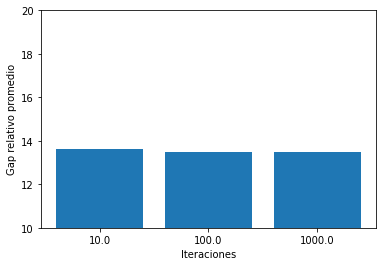

In [52]:
df_tabu = df_resultados[(df_resultados["metodo"]=="BL-Tabu")].copy();
df_tabu['gap'] = [(instancia['costo'] - optimos[instancia['instancia']][0]) / optimos[instancia['instancia']][0] * 100 for i, instancia in df_tabu.iterrows()]

iteraciones = df_tabu['iteraciones'];
ciclos_means = []
iteraciones = list(dict.fromkeys(iteraciones))
for i in iteraciones:
    ciclos_gaps = df_tabu[(df_tabu['tipo_memoria'] == "ciclos") & (df_tabu['iteraciones'] == i)]['gap'];
    ciclos_means.append(np.mean(ciclos_gaps))

x_pos = [i for i, _ in enumerate(iteraciones)]

plt.bar(x_pos, ciclos_means)
plt.xlabel("Iteraciones")
plt.ylabel("Gap relativo promedio")
plt.ylim(10, 20)
plt.xticks(x_pos, Ts)
plt.savefig("graficos/gaps-por-iteraciones-tabu.png")

In [53]:
df_tabu = df_resultados[(df_resultados["metodo"]=="BL-Tabu")].copy();
df_tabu['gap'] = [(instancia['costo'] - optimos[instancia['instancia']][0]) / optimos[instancia['instancia']][0] * 100 for i, instancia in df_tabu.iterrows()]

iteraciones = df_tabu['iteraciones'];
Ts = df_tabu['T'];
ciclos_means={}
iteraciones = list(dict.fromkeys(iteraciones))
Ts = list(dict.fromkeys(Ts))
for i in iteraciones:
    for j in Ts:
        ciclos_gaps = df_tabu[(df_tabu['tipo_memoria'] == "ciclos") & (df_tabu['iteraciones'] == i)  & (df_tabu['T'] == j)]['gap'];
        print(f'Iteraciones: {i} Memoria: {j} =>', np.mean(ciclos_gaps))

Iteraciones: 100.0 Memoria: 10.0 => 13.954573189319857
Iteraciones: 100.0 Memoria: 100.0 => 13.466126725557311
Iteraciones: 100.0 Memoria: 1000.0 => 13.466126725557311
Iteraciones: 500.0 Memoria: 10.0 => 13.954573189319857
Iteraciones: 500.0 Memoria: 100.0 => 13.419430242321349
Iteraciones: 500.0 Memoria: 1000.0 => 13.142216565271953
Iteraciones: 1000.0 Memoria: 10.0 => 13.954573189319857
Iteraciones: 1000.0 Memoria: 100.0 => 13.419430242321349
Iteraciones: 1000.0 Memoria: 1000.0 => 13.115343040898868


In [54]:
bins = [-1, 20, 40, 60, 80, 100, 250, np.inf]
labels = ['20', '40','60','80','100','250', '500']

df_goloso = df_resultados[df_resultados["metodo"]=="H-CG"].copy();
df_agm = df_resultados[df_resultados["metodo"]=="H-AGM"].copy();
df_bl = df_resultados[df_resultados["metodo"]=="BL"].copy();
df_tabu = df_resultados[(df_resultados["metodo"]=="BL-Tabu") & (df_resultados["T"]==1000) & (df_resultados["iteraciones"]==1000)].copy();

gaps_goloso = [(instancia_goloso['costo'] - optimos[instancia_goloso['instancia']][0]) / optimos[instancia_goloso['instancia']][0] * 100 for i, instancia_goloso in df_goloso.iterrows()]
gaps_agm = [(instancia_goloso['costo'] - optimos[instancia_goloso['instancia']][0]) / optimos[instancia_goloso['instancia']][0] * 100 for i, instancia_goloso in df_agm.iterrows()]
gaps_bl = [(instancia_goloso['costo'] - optimos[instancia_goloso['instancia']][0]) / optimos[instancia_goloso['instancia']][0] * 100 for i, instancia_goloso in df_bl.iterrows()]
gaps_tabu = [(instancia_goloso['costo'] - optimos[instancia_goloso['instancia']][0]) / optimos[instancia_goloso['instancia']][0] * 100 for i, instancia_goloso in df_tabu.iterrows()]

gaps_goloso = stats.trimboth(gaps_goloso, 0.05)
gaps_agm = stats.trimboth(gaps_agm, 0.05)
gaps_bl = stats.trimboth(gaps_bl, 0.05)
gaps_tabu = stats.trimboth(gaps_tabu, 0.05)


print('Mediana goloso:', np.median(gaps_goloso))
print('Mediana AGM:', np.median(gaps_agm))
print('Mediana Busqueda Local:', np.median(gaps_bl))
print('Mediana Tabu:', np.median(gaps_tabu))
print('Promedio goloso:',np.mean(gaps_goloso))
print('Promedio AGM:',np.mean(gaps_agm))
print('Promedio Busqueda Local:',np.mean(gaps_bl))
print('Promedio Tabu:',np.mean(gaps_tabu))
print('Varianza goloso:', np.var(gaps_goloso))
print('Varianza AGM:', np.var(gaps_agm))
print('Varianza Busqueda Local:', np.var(gaps_bl))
print('Varianza Tabu:', np.var(gaps_tabu))

Mediana goloso: 23.044096922929576
Mediana AGM: 35.10495113103066
Mediana Busqueda Local: 16.488508872640843
Mediana Tabu: 13.754646840148698
Promedio goloso: 23.868398740930637
Promedio AGM: 34.36323416935361
Promedio Busqueda Local: 16.579831170610984
Promedio Tabu: 13.117808084863029
Varianza goloso: 49.89575778447673
Varianza AGM: 51.48851020395873
Varianza Busqueda Local: 40.450865448557174
Varianza Tabu: 48.500509334011795


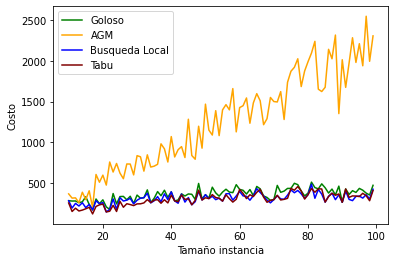

In [55]:
df_goloso = df_nuestros[(df_nuestros["metodo"]=="H-CG")].copy();
df_agm = df_nuestros[(df_nuestros["metodo"]=="H-AGM")].copy();
df_bl = df_nuestros[(df_nuestros["metodo"]=="BL")].copy();
df_tabu = df_nuestros[(df_nuestros["metodo"]=="BL-Tabu")].copy();

fig = sns.lineplot(data=df_goloso, x='tamaño', y='costo', color="green");
fig = sns.lineplot(data=df_agm, x='tamaño', y='costo', color="orange");
fig = sns.lineplot(data=df_bl, x='tamaño', y='costo', color="blue");
fig = sns.lineplot(data=df_tabu, x='tamaño', y='costo', color="maroon");
fig.legend(labels=['Goloso','AGM', "Busqueda Local", "Tabu"]);
fig.set(xlabel='Tamaño instancia', ylabel='Costo');
plt.savefig("graficos/comparacion-costo-tamanio-todos.png")

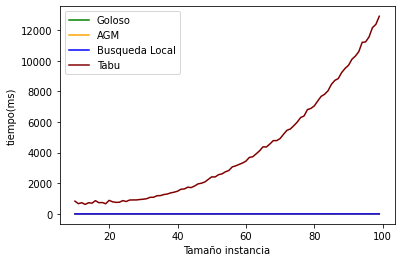

In [56]:
# Comparamos el dataset densidad-alta contra una función exponencial.
df_goloso = df_nuestros[(df_nuestros["metodo"]=="H-CG")].copy();
df_agm = df_nuestros[(df_nuestros["metodo"]=="H-AGM")].copy();
df_bl = df_nuestros[(df_nuestros["metodo"]=="BL")].copy();
df_tabu = df_nuestros[(df_nuestros["metodo"]=="BL-Tabu")].copy();

fig = sns.lineplot(data=df_goloso, x='tamaño', y='tiempo', color="green");
fig = sns.lineplot(data=df_agm, x='tamaño', y='tiempo', color="orange");
fig = sns.lineplot(data=df_bl, x='tamaño', y='tiempo', color="blue");
fig = sns.lineplot(data=df_tabu, x='tamaño', y='tiempo', color="maroon");
fig.legend(labels=['Goloso','AGM', "Busqueda Local", "Tabu"]);
fig.set(xlabel='Tamaño instancia', ylabel='tiempo(ms)');
plt.savefig("graficos/comparacion-tiempo-tamanio-todos.png")

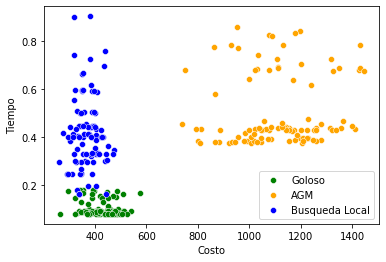

In [57]:
# Comparamos el dataset densidad-alta contra una función exponencial.
df_goloso = df_fijos[(df_fijos["metodo"]=="H-CG")].copy();
df_agm = df_fijos[(df_fijos["metodo"]=="H-AGM")].copy();
df_bl = df_fijos[(df_fijos["metodo"]=="BL")].copy();
df_tabu = df_fijos[(df_fijos["metodo"]=="BL-Tabu")].copy();

fig = sns.scatterplot(data=df_goloso, x='costo', y='tiempo', color="green");
fig = sns.scatterplot(data=df_agm, x='costo', y='tiempo', color="orange");
fig = sns.scatterplot(data=df_bl, x='costo', y='tiempo', color="blue");
fig.legend(labels=['Goloso','AGM', "Busqueda Local", "Tabu"]);
fig.set(xlabel='Costo', ylabel='Tiempo');
plt.savefig("graficos/AGM-Goloso-BL-CostovsTiempo.png")